# Figure 1

## Set-up

In [34]:
# Import modules and set some key functions

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import TDAtools as TDAtl

  
class HandlerSquare(HandlerPatch): ## for creating image legend

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = xdescent + 0.5 * (width - height), ydescent
        p = mpatches.Rectangle(xy=center, width=height,
                               height=height, angle=0.0)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p] 

def plot_coral_image(ax, image, size=25, colors=['#EE8382', '#508991', '#172A3A']):
    
    # Flip image
    
    # Parameters
    levels = [0, 1, 2]
    type_palette = sns.set_palette(sns.color_palette(colors))
    cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')
    
    # Plot
    ax.imshow(image, cmap=cmap, norm=norm)
    ax.set_xticks(np.arange(-.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, size, 1), minor=True)
    ax.set_frame_on(True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.grid(color='black', linestyle='-', alpha=0.1, linewidth=.2, which='minor')
    ax.tick_params(which='minor',top=[], left=[],right=[], bottom=[]) 
    
    return ax

In [35]:
# Set up figure with subplots

fig = plt.figure(figsize = (28, 11))

gs0 = gridspec.GridSpec(1, 4, figure=fig, wspace=0.3)

# Model motivation
gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0])
ax1 = [fig.add_subplot(gs00[i]) for i in range(2)]

# Model definition
gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1], hspace=.3)

# Neighborhood definition
gs010 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs01[0])
ax2A = [fig.add_subplot(gs010[i]) for i in range(2)]
# Local fractional cover
gs011 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs01[1])
ax2B = [fig.add_subplot(gs011[i]) for i in range(1)]
# Initial config
gs012 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs01[2])
ax2C = [fig.add_subplot(gs012[i]) for i in range(2)]

# Model simulation

gs02 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[2:])

# Graph
gs020 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs02[0, :])
ax3A = fig.add_subplot(gs020[0])

# Pictures
gs021 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs02[1, :])
ax3B = [fig.add_subplot(gs021[i]) for i in range(4)]

# Some parameters
heading_text_params = {'fontweight': 'bold', 'fontsize': 18}
title_text_params = {'fontweight':'bold', 'fontsize':16}
subtitle_text_params = {'fontsize': 16}

## A. Model motivation

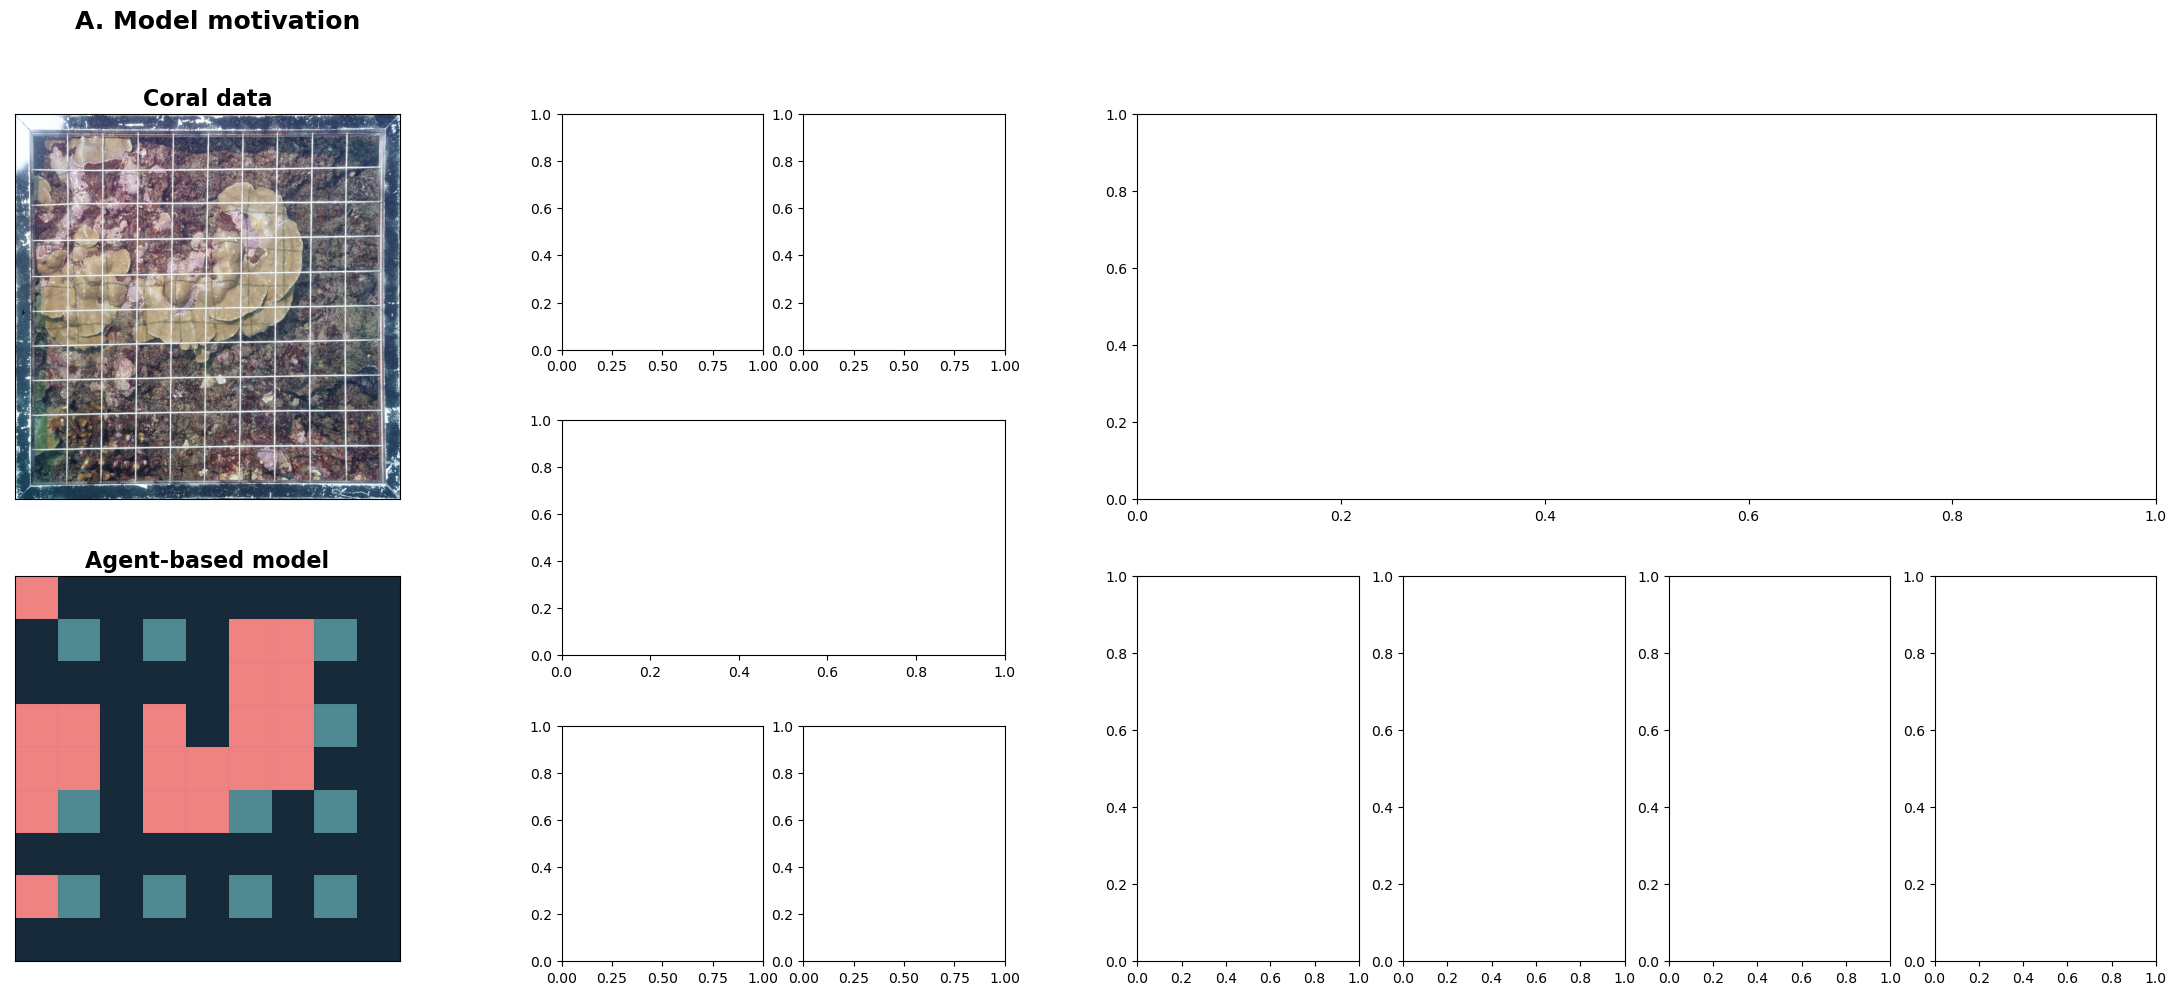

In [36]:
### Need to run SI/initial_profiles.sh

levels = [0, 1, 2]
colors =['#EE8382', '#508991', '#172A3A']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

photo_image = np.array([
    [1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,0],
    [0,0,0,0,0,1,1,0,0],
    [1,1,0,1,0,1,1,0,0],
    [1,1,0,1,1,1,1,0,0],
    [1,0,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]
])

for i in range(9):
    for j in range(9):
        if photo_image[i][j]==0:
            if  i * j % 2 == 0:
                photo_image[i][j]=-2
            else:
                photo_image[i][j]=-1
photo_image[photo_image==1] = 0
photo_image[photo_image==-1] = 1
photo_image[photo_image==-2] = 2
model_image = plt.imread('./figures/paper/1_introduction_figure/NukuHiva2014_D18.jpg')

for index in range(2):
    if index == 1:
        ax1[index] = plot_coral_image(ax1[index], photo_image, size=9)
    else:
        ax1[index].imshow(model_image)
        ax1[index].set_xticks([])
        ax1[index].set_yticks([])
            

    ax1[index].set_frame_on(True)

    
ax1[0].text(1200, -550, 'A. Model motivation', ha='center', va='center', fontdict=heading_text_params)
ax1[0].set_title('Coral data', fontdict=title_text_params)
ax1[1].set_title('Agent-based model', fontdict=title_text_params)
#ax1[1].set_xlim([-.5, 8.5])
#ax1[1].set_ylim([-.5, 8.5])

# view figure
fig
 

## B. Model construction

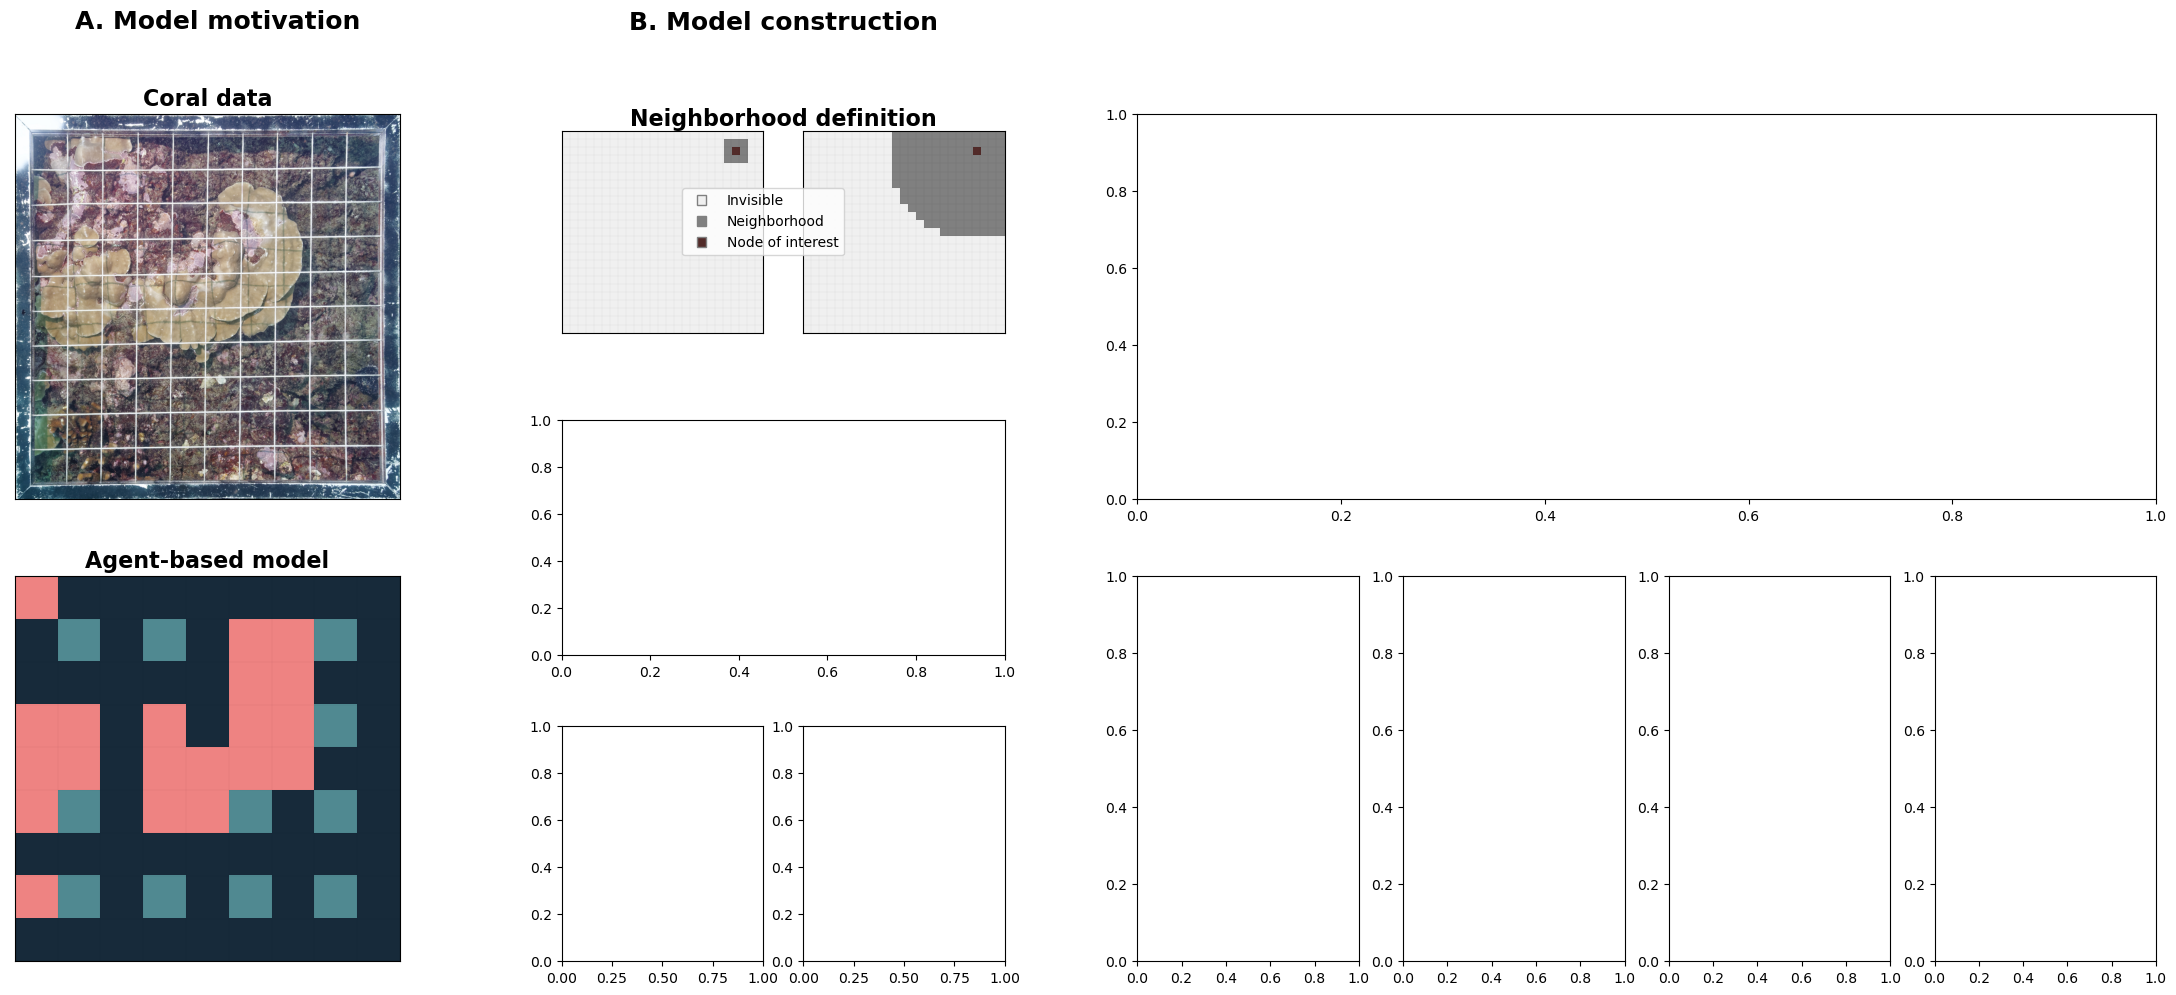

In [37]:
# Neighborhood definition

thresholds = [1.45, 11]
threshold_image_data = [
    # small threshold
    [[1, 1, 1, 2, 2, 2, 3, 3, 3],  # xlocations
     [20, 21, 22, 20, 21, 22, 20, 21, 22],  # ylocations
     [1, 1, 1, 1, 2, 1, 1, 1, 1]], # values
    # large threshold
    [[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
      1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
      2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
      3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
      4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
      6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
      7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
      8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
      10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
      11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12],  # xlocations
     [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 11, 12, 13,
      14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 11, 12, 13, 14, 15, 16,
      17, 18, 19, 20, 21, 22, 23, 24, 11, 12, 13, 14, 15, 16, 17, 18, 19,
      20, 21, 22, 23, 24, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
      23, 24, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 11,
      12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 12, 13, 14, 15,
      16, 17, 18, 19, 20, 21, 22, 23, 24, 12, 13, 14, 15, 16, 17, 18, 19,
      20, 21, 22, 23, 24, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
      14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 15, 16, 17, 18, 19, 20,
      21, 22, 23, 24, 17, 18, 19, 20, 21, 22, 23, 24],  # ylocations
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] # values
]
                        
threshold_images = []

for t in range(2):
    
    image = np.zeros((25, 25))
    
    for i, j, val in zip(*threshold_image_data[t]):
        image[i, j] = val
        
    threshold_images.append(image)

# Parameters

# Names
name = 'neighborhood_definition' 
titles = [r"Threshold ($\ell$) = "+str(thresholds[0]), 
          r"Threshold ($\ell$) = "+str(thresholds[1])]
legend_lables = ['Invisible', 'Neighborhood', 'Node of interest']

# Color Scheme
levels = [0, 1, 2]
colors = ['#f0f0f0', 'gray', '#522B29']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')
    
# Plot

for index, image in enumerate(threshold_images):

    ax2A[index] = plot_coral_image(ax2A[index], image, colors=colors)
    ax2A[index].set_frame_on(True)

    
patches = [mpatches.Patch(facecolor=colors[i], edgecolor="grey", label=legend_lables[i]) for i in levels]
ax2A[0].legend(handles=patches,
               borderaxespad=0., handler_map={patches[i]:HandlerSquare() for i in levels},
               loc='center', bbox_to_anchor=(1,.55), shadow=False, ncol=1)
ax2A[0].set_zorder(2)
ax2A[0].text(27, -2, "Neighborhood definition", ha='center', va='center', fontdict=title_text_params)

ax2A[0].text(27, -14, 'B. Model construction', ha='center', va='center', fontdict=heading_text_params)


fig
    

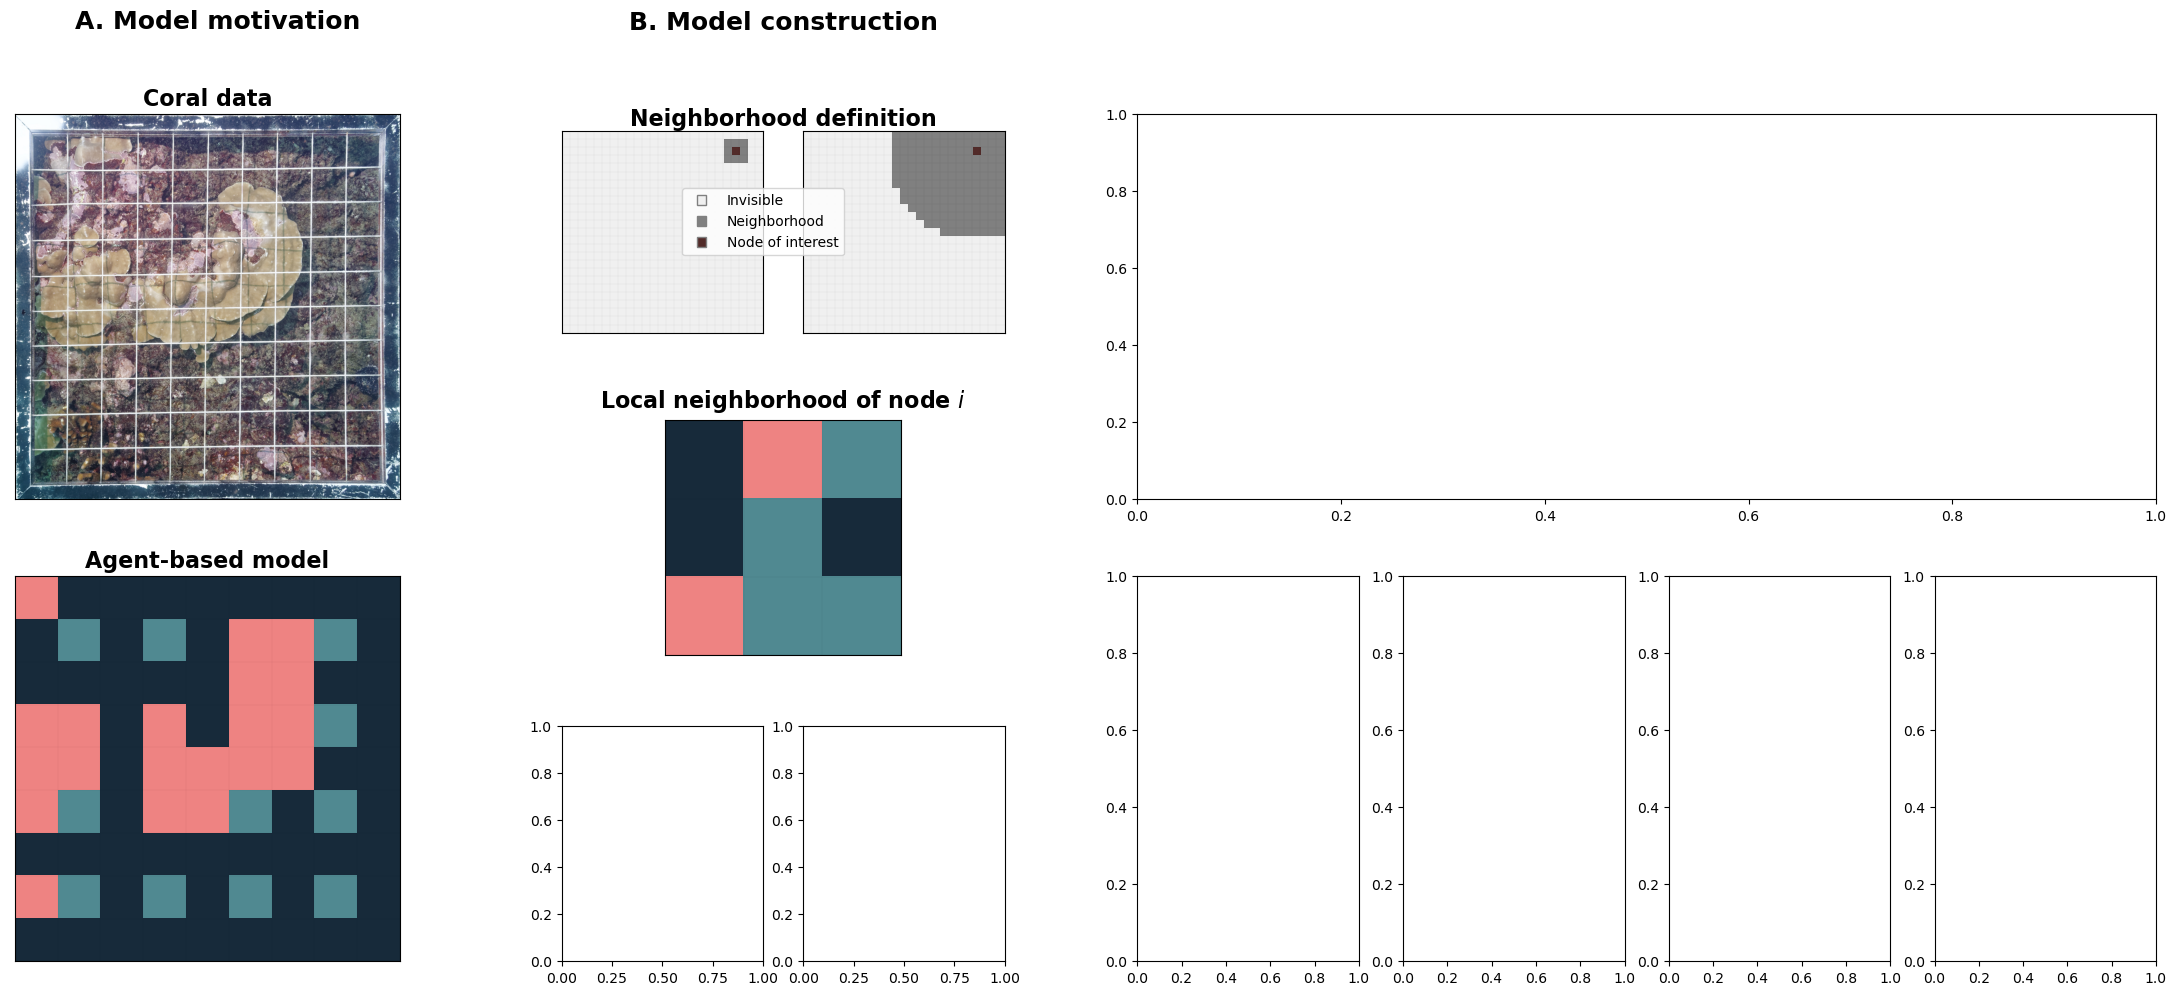

In [38]:
# Local neighborhood definition

# Names
titles = ["Random", "Blob"]

# Image
image = np.array([[2, 0, 1], [2, 1, 2], [0, 1, 1]])

# Plot
ax2B[0] = plot_coral_image(ax2B[0], image, 3)
ax2B[0].set_xticks(np.arange(-.5, 3, 1), minor=True)
ax2B[0].set_yticks(np.arange(-.5, 3, 1), minor=True)
ax2B[0].set_frame_on(True)
    
ax2B[0].text(1, -.75, "Local neighborhood of node $i$",
             ha='center', va='center', fontdict=title_text_params)
    
fig

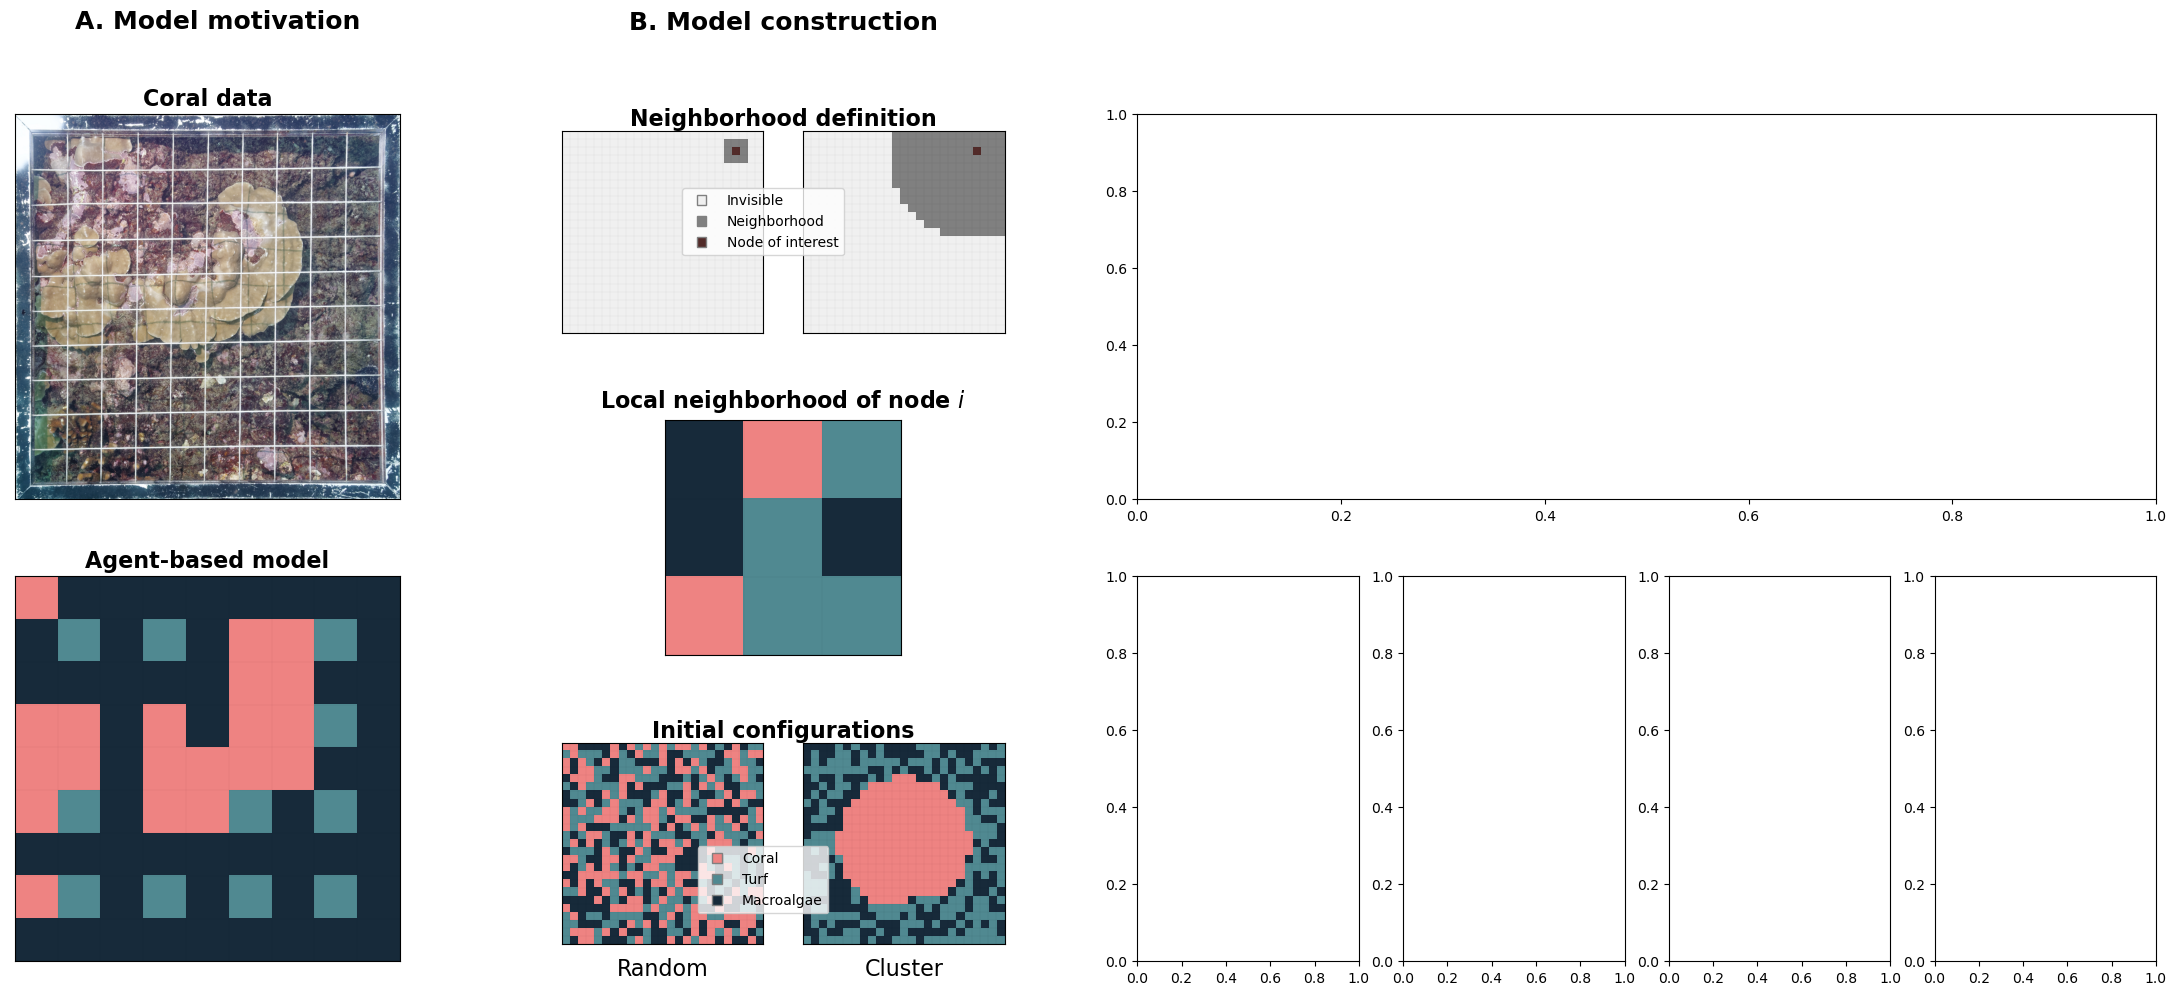

In [39]:
# Initial configurations

images = []
for grid_option in [0, 2]:
    df = pd.read_csv('./output/25x25/grid'+str(grid_option)+'/grazing11/threshold145/coral33-macro33-r10-d40-a20-y75-time10-rec10-nsim1.csv')
    df = df[df.simulation==0]
    image = np.genfromtxt([df[df.timestep==0]['image'].values[0].replace('[', '').replace(']', '')])
    images.append(np.reshape(image, (25, 25)))
    
# Plot images
name = 'initial_profile'
titles = ["Random", "Cluster"]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
for index, image in enumerate(images):
    ax2C[index] = plot_coral_image(ax2C[index], image)
    ax2C[index].set_xlabel(titles[index], fontdict=subtitle_text_params)
    ax2C[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax2C[index].set_frame_on(True)


# Color Scheme
levels = [0, 1, 2]
colors = ['#EE8382', '#508991', '#172A3A']
type_palette = sns.set_palette(sns.color_palette(colors))
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')
patches = [mpatches.Patch(facecolor=colors[i], edgecolor="grey", label=legend_keys[i]) for i in levels]
ax2C[0].legend(handles=patches,
           borderaxespad=0., handler_map={patches[i]:HandlerSquare() for i in levels},
           loc='center', bbox_to_anchor=(1,.32), shadow=False, ncol=1)
ax2C[0].set_zorder(2)
ax2C[0].text(27, -2, "Initial configurations", ha='center', va='center', fontdict=title_text_params)

fig

# C. Model simulation

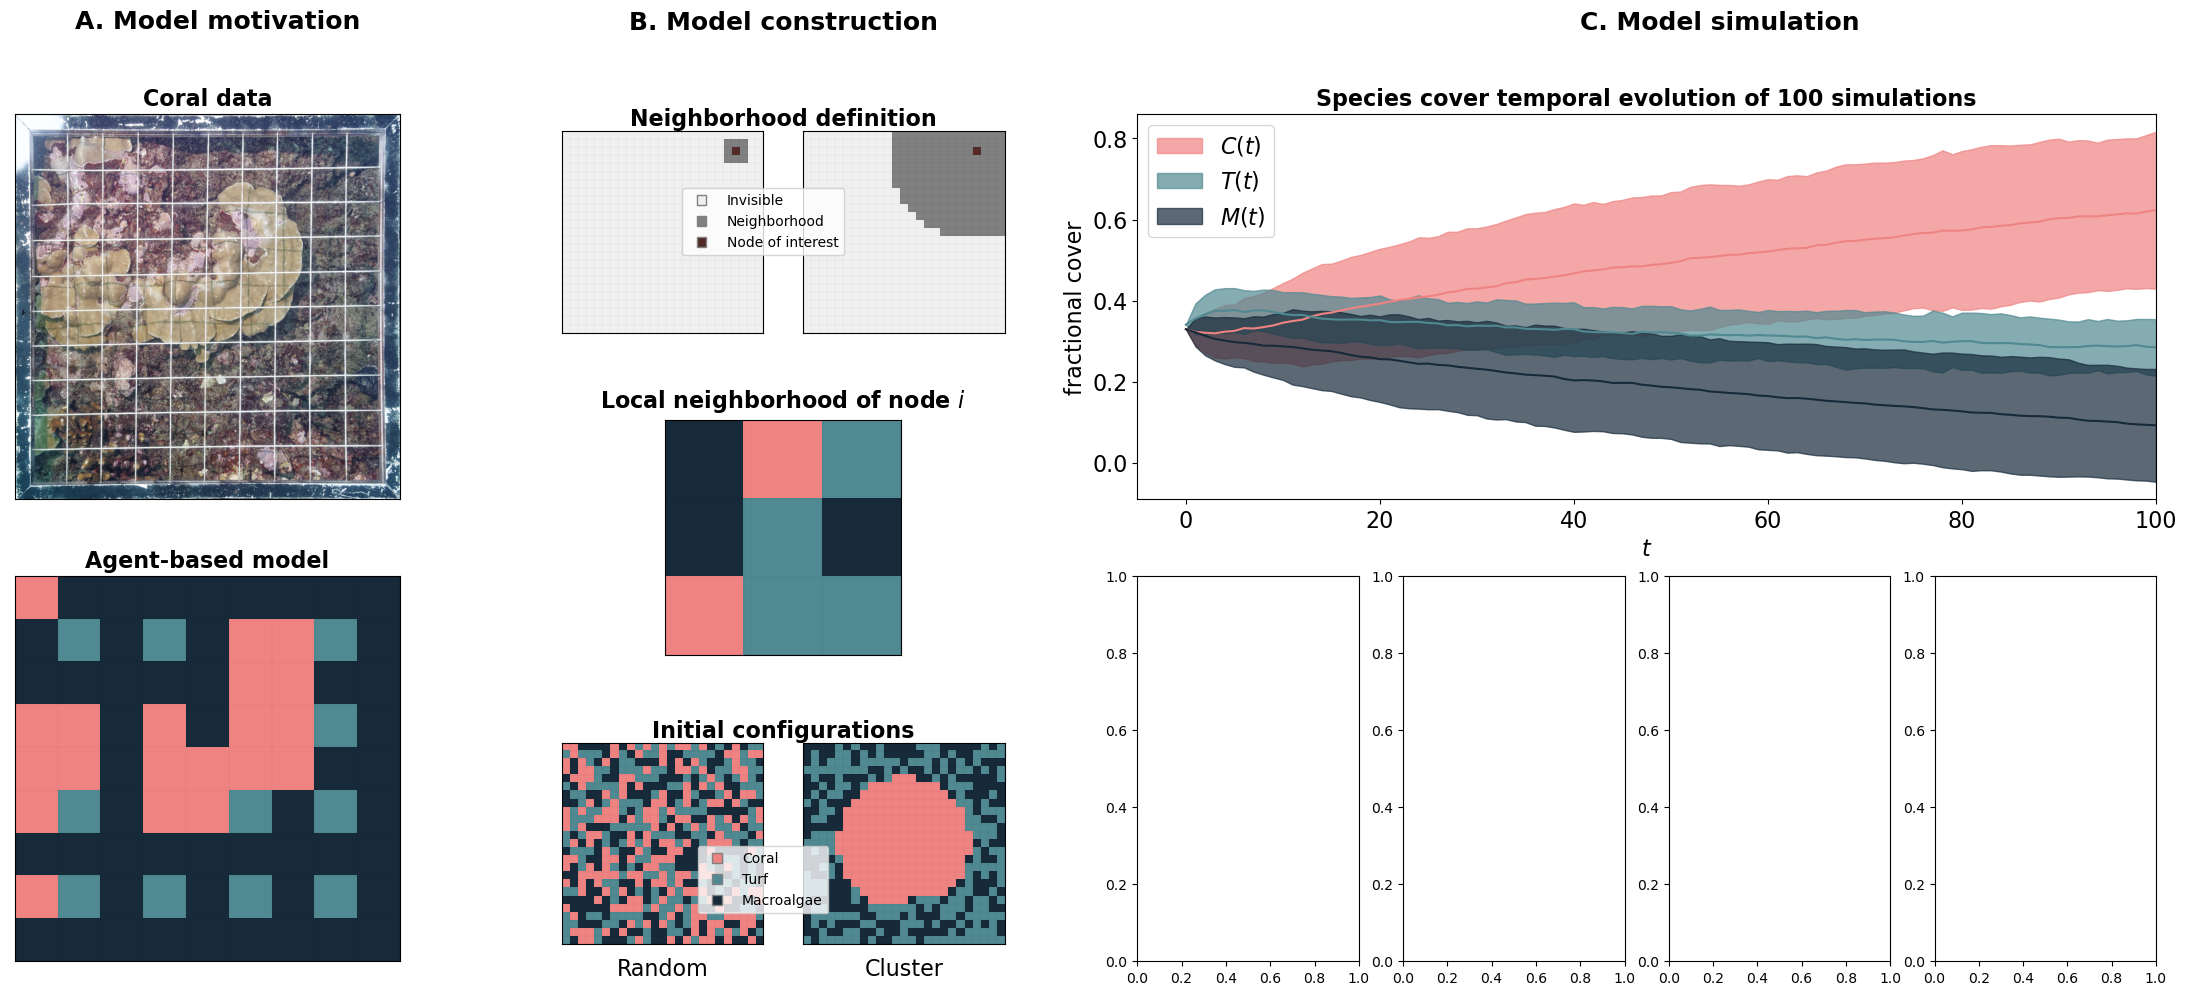

In [40]:
# Species cover over 100 simulations

df = pd.read_csv('./output/25x25/grid0/grazing58/threshold145/coral33-macro33-r10-d40-a20-y75-time1010-rec10-nsim100.csv')
df['C'] = df.coral_count/(25**2)
df['T'] = df.turf_count/(25**2)
df['M'] = df.macroalgae_count/(25**2)
df['time'] = df.timestep*.1

dfplot = df.copy()

df_to_melt = dfplot[['C','timestep', 'time', 'simulation', 'M', 'T']]
df_melted = pd.melt(df_to_melt, id_vars=['timestep','time','simulation'], value_vars=['C', 'T','M'])
df_melted.head()

# Isolate Statistical Descriptors of Example Run
factor = 2
stdC = df[['C','time']].groupby('time').std()['C']
meanC = df[['C','time']].groupby('time').mean()['C']
maxC = meanC + factor * stdC
minC = meanC - factor * stdC

stdT = df[['T','time']].groupby('time').std()['T']
meanT = df[['T','time']].groupby('time').mean()['T']
maxT = meanT + factor * stdT
minT = meanT - factor * stdT

stdM = df[['M','time']].groupby('time').std()['M']
meanM = df[['M','time']].groupby('time').mean()['M']
maxM = meanM + factor * stdM
minM = meanM - factor * stdM

time = df['time'].unique()

ax3A.fill_between(time, minC, maxC, alpha=.7, color='#EE8382', label='$C(t)$')
ax3A.fill_between(time, minT, maxT , alpha=.7, color='#508991', label='$T(t)$')
ax3A.fill_between(time, minM, maxM, alpha=.7, color='#172A3A', label='$M(t)$')

ax3A.plot(time, meanC, 'k-', color='#EE8382')
ax3A.plot(time, meanT, 'k-', color='#508991')
ax3A.plot(time, meanM, 'k-', color='#172A3A')

ax3A.set_title('Species cover temporal evolution of 100 simulations', fontdict=title_text_params)
ax3A.legend(loc='upper left', fontsize=subtitle_text_params['fontsize'])
ax3A.set_ylabel('fractional cover', fontdict=subtitle_text_params)
ax3A.set_xlabel('$t$', fontdict=subtitle_text_params)
ax3A.tick_params(axis='x', labelsize=subtitle_text_params['fontsize'])
ax3A.tick_params(axis='y',labelsize=subtitle_text_params['fontsize'])
ax3A.set_xlim([-5,100])

ax3A.text(55, 1.085, 'C. Model simulation', ha='center', va='center', fontdict=heading_text_params)

fig

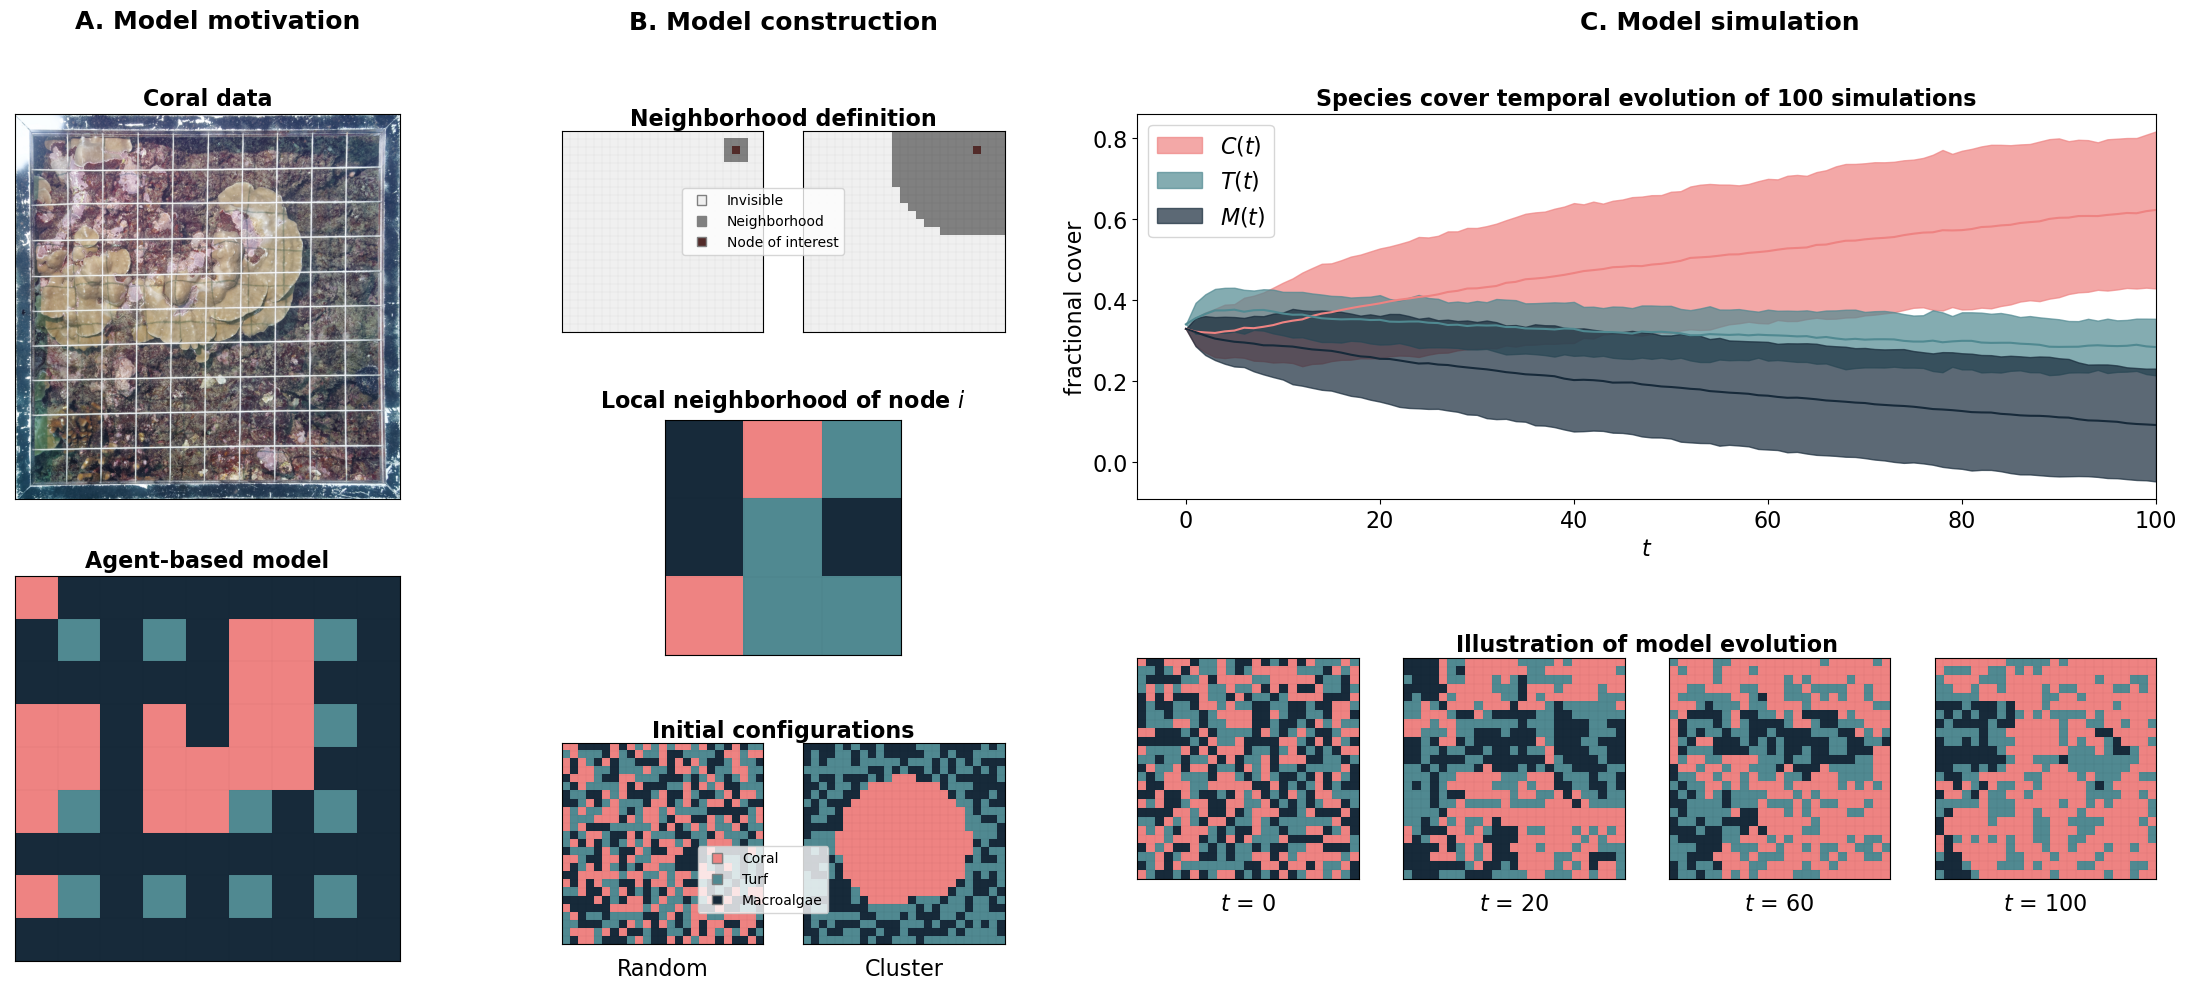

In [41]:
# Initial configurations

images = []
for index, timestep in enumerate([0, 200, 600, 1000]):
    df = pd.read_csv('./output/25x25/grid0/grazing58/threshold145/coral33-macro33-r10-d40-a20-y75-time1010-rec10-nsim100.csv')
    df = df[df.simulation==1]
    image = np.genfromtxt([df[df.timestep==timestep]['image'].values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, ((25, 25)))
    ax3B[index] = plot_coral_image(ax3B[index], image)
    ax3B[index].set_xlabel(r'$t$ = ' + str(int(timestep*.1)), fontdict=subtitle_text_params)
    ax3B[index].set_xlabel(r'$t$ = ' + str(int(timestep*.1)), fontdict=subtitle_text_params)


ax3B[1].text(27, -2, "Illustration of model evolution", ha='center', va='center', fontdict=title_text_params)

fig

[[0.3017219387755102, 0.3017219387755102], [0.9722774826183916, 0.09272251738160828]]


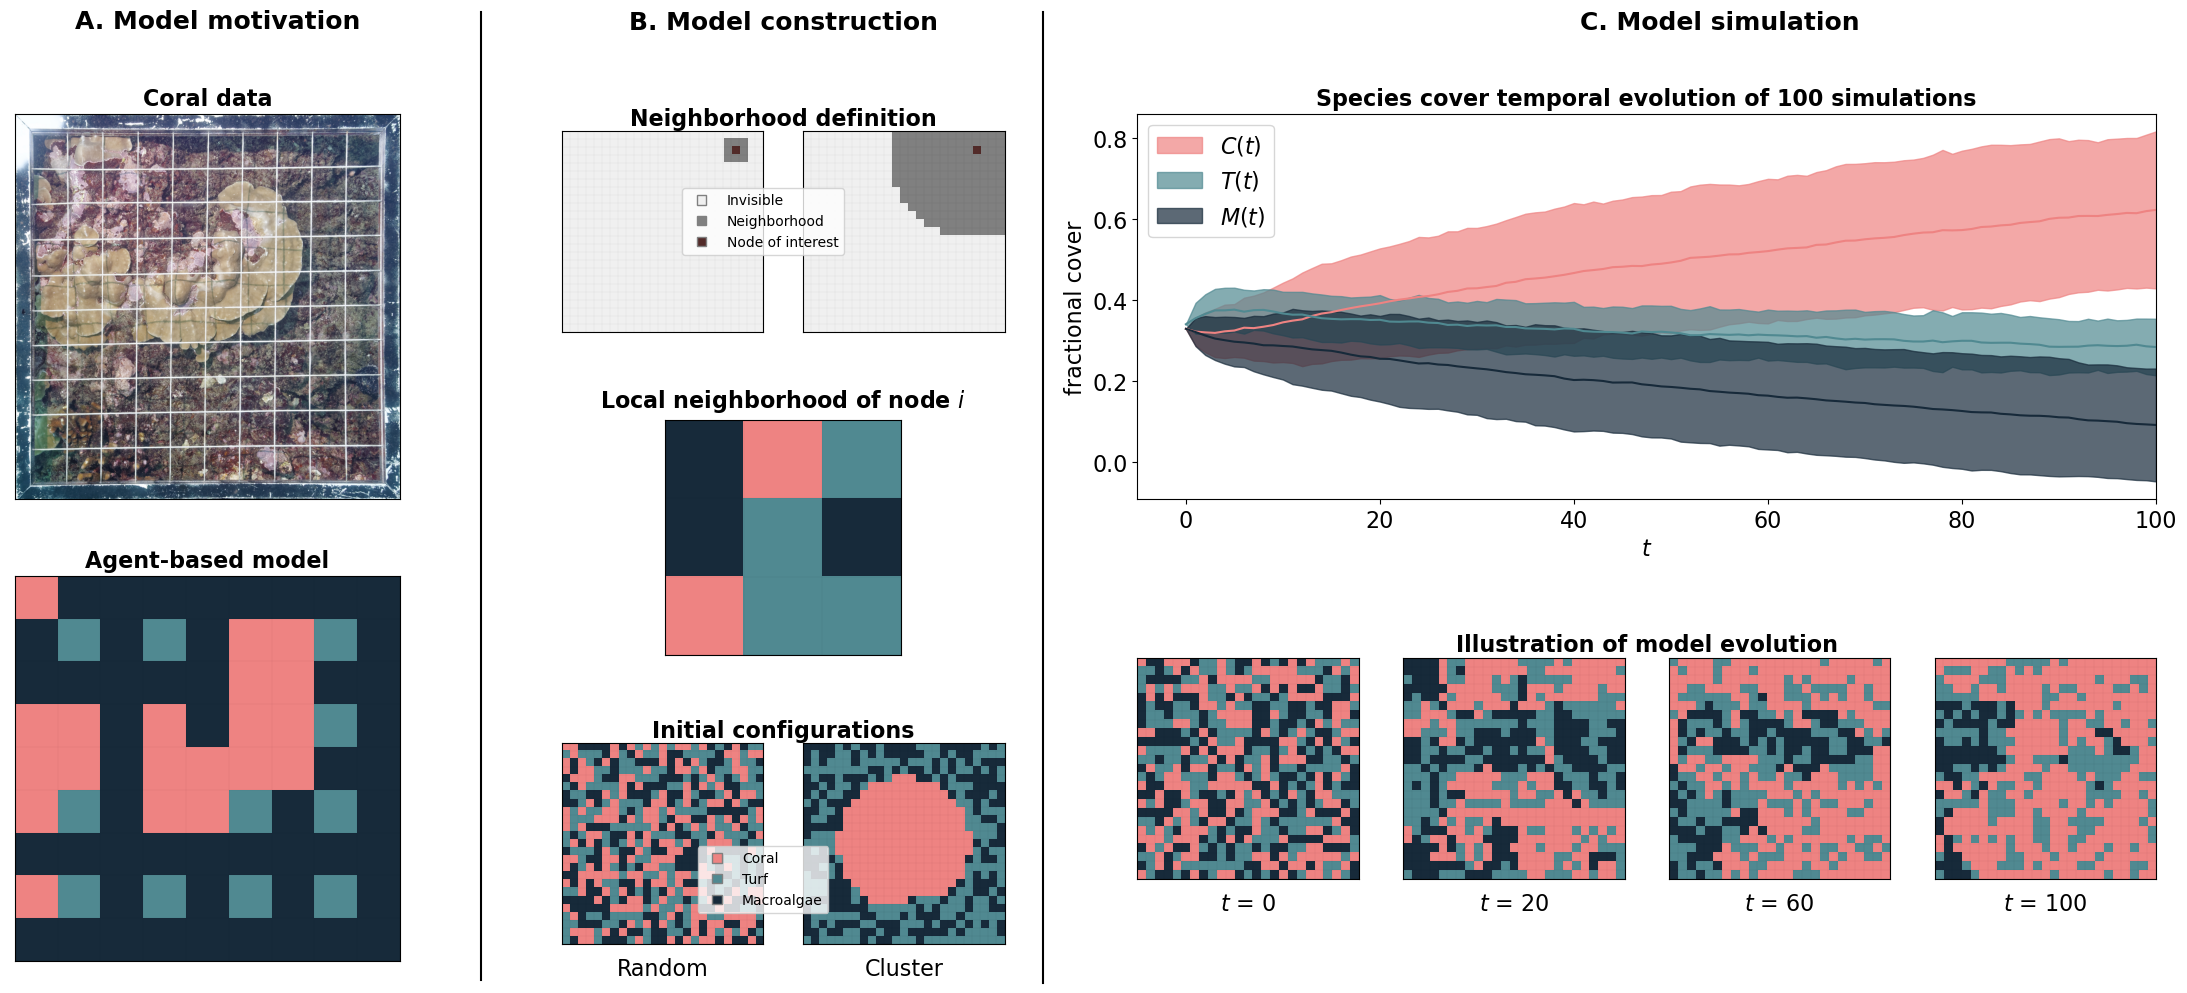

In [42]:
# Plot lines

line1_params = [[ax1[0].get_position(), ax2A[0].get_position()],
         [ax1[1].get_position(), ax2C[0].get_position()]]

line2_params = [[ax2A[1].get_position(), ax3A.get_position()],
         [ax2C[-1].get_position(), ax3B[0].get_position()]]
        
line1 = [[(line1_params[0][0].xmax + line1_params[0][1].xmin + 
           line1_params[1][0].xmax + line1_params[1][1].xmin)/4]*2,
         [0.1+(line1_params[0][0].ymax + line1_params[0][1].ymax)/2,
         -0.025+(line1_params[1][0].ymin + line1_params[1][1].ymin)/2]]

line2 = [[-.01+(line2_params[0][0].xmax + line2_params[0][1].xmin + 
           line2_params[1][0].xmax + line2_params[1][1].xmin)/4]*2,
         [0.1+(line2_params[0][0].ymax + line2_params[0][1].ymax)/2,
         -0.065+(line2_params[1][0].ymin + line2_params[1][1].ymin)/2]]
print(line1)
plot_line1 = plt.Line2D(line1[0], line1[1], color="black")
plot_line2 = plt.Line2D(line2[0], line2[1], color="black")
fig.add_artist(plot_line1)
fig.add_artist(plot_line2)

fig

In [43]:
fig.savefig('./figures/paper/1_introduction_figure/fig1.pdf', bbox_inches = "tight")